## About the Topic
A backorder is an item that is not in stock at the moment. The customer can still order it, but delivery will only happen once the stock has been replenished. This is different from a situation when a product is labeled as being “out-of-stock” on the web platform which means the customer can’t order the product. However, backorders can still be placed despite the product not being in stock at a given moment in time. However, this causes a lot of additional inventory costs and wait for the customers, which is undesirable.

### Objective
The aim is to create a prediction model largely to identify whether items could be going out of stock or on backorder. This will help us to keep adequate or surplus stock of those products in order to meet demands of customers and not lose sales opportunities.

### Data Description
The list of all features and explanation of certain features (only unknown or technical jargons) in the features given the dataset have been provided below :

- **sku** : a stock keeping unit is a distinct type of item for sale, such as a product or service, and all attributes associated with the item type that distinguish it from other item types

- **national_inv**: The present inventory level of the product

- **lead_time** :  lead time in inventory management is the amount of time between when a purchase order is placed to replenish products and when the order is received in the warehouse. Order lead times can vary between suppliers; the more suppliers involved in the chain, the longer the lead time is likely to be.

- **in_transit_qty** : In transit inventory, also called transportation inventory or goods in transit, is any good shipped by a seller but not yet received by a buyer

- **forecast_3_month** : Forecasted sales of the product for the next 3 months.

- **forecast_6_month** : Forecasted sales of the product for the next 6 months.

- **forecast_9_month** : Forecasted sales of the product for the next 9 months.

- **sales_1_month** : Actual Sales of the product in the last 1 month.

- **sales_3_month** : Actual Sales of the product in the last 3 months.

- **sales_6_month** : Actual Sales of the product in the last 6 months.

- **sales_9_month** : Actual Sales of the product in the last 9 months.

- **min_bank**: Minimum amount of stock recommended to have.

- **potential_issue**: Any problem identified with the product or part.

- **pieces_past_due** : Assumption - The stock items that have been kept in stock for long time, past their expected life span.

- **perf_6_month_avg** : Average sales performance of product over last 6 months.

- **perf_12_month_avg**: Average sales performance of product over last 12 months.

- **local_bo_qty** : BO QTY in inventory managment refers to the Back Order Quantity. To find Back Order Quantity, divide the number of undeliverable orders by the total number of orders and multiply the result by 100.

- **deck_risk** : Assumption - It is the risk associated with keeping the items in stock and could relate to damage, shelf life, theft, etc. 
- oe_constraint
- **ppap_risk** : Short for Production Part Approval Process, it is a risk reduction process which is used as a risk classification and qualification process which is used to determine whether a production run will produce parts with consistency and repeatability. It is done prior to product release
- **stop_auto_buy** : Has the auto buy for the product, which was back ordered, cancelled.
- rev_stop

**TARGET FEATURE** : went_on_backorder - Whether an items was backordered or not

### Initializing Logger

In [1]:
import logging

logging.basicConfig(filename = "Logging.txt",level=logging.INFO,filemode='a',format = '%(asctime)s %(levelname)s-%(message)s',datefmt='%Y-%m-%d %H:%M:%S')
logger = logging.getLogger()

### Importing the Pre-requisite Packages and Dataset

In [2]:
# import sagemaker
# import boto3
# from sagemaker.amazon.amazon_estimator import logging, get_image_uri
# from sagemaker.session import s3_input,Session

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as exp
import warnings
warnings.filterwarnings('ignore')
logger.info("All pre-requisite packages imported")

In [3]:
data = pd.read_csv("Kaggle_Training_Dataset_v2.csv")
logger.info("Dataset Imported successfully")

## Data Understanding

In [4]:
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [5]:
data.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [6]:
data[['lead_time', 'in_transit_qty','forecast_6_month', 'sales_6_month','pieces_past_due', 'perf_6_month_avg', 'oe_constraint','ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']]

,lead_time,in_transit_qty,forecast_6_month,sales_6_month,pieces_past_due,perf_6_month_avg,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,NaN,0.0,0.0,0.0,0.0,-99.00,No,No,Yes,No,No
1,9.0,0.0,0.0,0.0,0.0,0.99,No,No,Yes,No,No
2,NaN,0.0,0.0,0.0,0.0,-99.00,No,No,Yes,No,No
3,8.0,0.0,0.0,0.0,0.0,0.10,No,No,Yes,No,No
4,NaN,0.0,0.0,0.0,0.0,-99.00,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...
1687856,NaN,0.0,7.0,3.0,0.0,-99.00,No,No,Yes,No,No
1687857,9.0,0.0,9.0,11.0,0.0,0.86,No,No,No,No,Yes
1687858,9.0,16.0,87.0,153.0,0.0,0.86,No,No,Yes,No,No
1687859,4.0,0.0,0.0,12.0,0.0,0.73,No,No,Yes,No,No


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [8]:
data.select_dtypes(include=np.number).columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

In [9]:
len(data.select_dtypes(include=np.number).columns)

15

In [10]:
data.select_dtypes(include=np.number).head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,-99.00,-99.00,0.0


In [11]:
data.select_dtypes(exclude=np.number).columns

Index(['sku', 'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [12]:
len(data.select_dtypes(exclude=np.number).columns)

8

In [13]:
data.select_dtypes(exclude=np.number).head()

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,No,No,No,No,Yes,No,No
1,1043384,No,No,No,No,Yes,No,No
2,1043696,No,Yes,No,No,Yes,No,No
3,1043852,No,No,No,No,Yes,No,No
4,1044048,No,Yes,No,No,Yes,No,No


In [14]:
data.nunique()

sku                  1687861
national_inv           14969
lead_time                 32
in_transit_qty          5230
forecast_3_month        7825
forecast_6_month       11114
forecast_9_month       13662
sales_1_month           5764
sales_3_month          10495
sales_6_month          14818
sales_9_month          18341
min_bank                5568
potential_issue            2
pieces_past_due          826
perf_6_month_avg         102
perf_12_month_avg        102
local_bo_qty             654
deck_risk                  2
oe_constraint              2
ppap_risk                  2
stop_auto_buy              2
rev_stop                   2
went_on_backorder          2
dtype: int64

In [15]:
data.nunique() / len(data) * 100

sku                  100.000000
national_inv           0.886862
lead_time              0.001896
in_transit_qty         0.309860
forecast_3_month       0.463605
forecast_6_month       0.658467
forecast_9_month       0.809427
sales_1_month          0.341497
sales_3_month          0.621793
sales_6_month          0.877916
sales_9_month          1.086642
min_bank               0.329885
potential_issue        0.000118
pieces_past_due        0.048938
perf_6_month_avg       0.006043
perf_12_month_avg      0.006043
local_bo_qty           0.038747
deck_risk              0.000118
oe_constraint          0.000118
ppap_risk              0.000118
stop_auto_buy          0.000118
rev_stop               0.000118
went_on_backorder      0.000118
dtype: float64

In [16]:
data.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [17]:
data.isnull().sum() / len(data) * 100

sku                  0.000000
national_inv         0.000059
lead_time            5.977625
in_transit_qty       0.000059
forecast_3_month     0.000059
forecast_6_month     0.000059
forecast_9_month     0.000059
sales_1_month        0.000059
sales_3_month        0.000059
sales_6_month        0.000059
sales_9_month        0.000059
min_bank             0.000059
potential_issue      0.000059
pieces_past_due      0.000059
perf_6_month_avg     0.000059
perf_12_month_avg    0.000059
local_bo_qty         0.000059
deck_risk            0.000059
oe_constraint        0.000059
ppap_risk            0.000059
stop_auto_buy        0.000059
rev_stop             0.000059
went_on_backorder    0.000059
dtype: float64

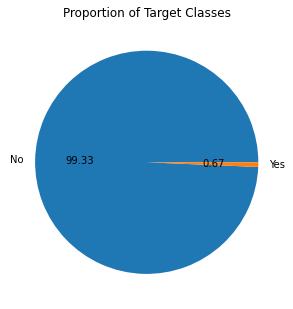

In [18]:
plt.figure(figsize=(5,6))
proportions = data.went_on_backorder.value_counts(1)*100
labels = data.went_on_backorder.value_counts(1).index
plt.pie(x=proportions,labels=labels,autopct="%.2f")
plt.title("Proportion of Target Classes")
plt.show()

### Observations - 
- In total, there are 23 variables, of which 15 are numerical and 8 are categorical
- All the numerical features are continous in nature.
- sku is unique for each record as it helps to identify each item uniquely.
- In terms of missing values, we can see that in all variables except sku, there is 1 missing value. This record can be dropped.
- Only lead time has more than 1 missing values. It has close to 6% missing values.
- Also, based on the proportion of target classes, with more than 99% of data being for "No" class, we can say that our data is heavily imbalanced.

## Data Cleaning

In [19]:
logger.info("Data Cleaning Started")

In [20]:
for i in data.columns:
    if i == i.strip():
        print(f"{i} has no trailing space","",sep="\n")
    else:
        print(f"{i} has trailing space","",sep="\n")
logger.info("Trailing spaces in column names checked")

sku has no trailing space

national_inv has no trailing space

lead_time has no trailing space

in_transit_qty has no trailing space

forecast_3_month has no trailing space

forecast_6_month has no trailing space

forecast_9_month has no trailing space

sales_1_month has no trailing space

sales_3_month has no trailing space

sales_6_month has no trailing space

sales_9_month has no trailing space

min_bank has no trailing space

potential_issue has no trailing space

pieces_past_due has no trailing space

perf_6_month_avg has no trailing space

perf_12_month_avg has no trailing space

local_bo_qty has no trailing space

deck_risk has no trailing space

oe_constraint has no trailing space

ppap_risk has no trailing space

stop_auto_buy has no trailing space

rev_stop has no trailing space

went_on_backorder has no trailing space



In [21]:
## This is the record with values for all variables missing. Hence it will be dropped
data.drop("sku",axis=1)[(data.drop("sku",axis=1).isnull()).all(axis=1)].index

Int64Index([1687860], dtype='int64')

In [22]:
data.drop(1687860,inplace=True)
logger.info("Records no. 1687860 being dropped due to being total empty")

In [23]:
for i in data.select_dtypes(include=np.object).columns[1:]:
    print(i,":",data[i].unique())
logger.info("Unique values in categorical features checked")

potential_issue : ['No' 'Yes']
deck_risk : ['No' 'Yes']
oe_constraint : ['No' 'Yes']
ppap_risk : ['No' 'Yes']
stop_auto_buy : ['Yes' 'No']
rev_stop : ['No' 'Yes']
went_on_backorder : ['No' 'Yes']


#### Observations - 

- None of the columns names have any trailing space.
- All the categorical features have 2 unique values i.e Yes and No, which look alright.
- The one records with all values missing has been dropped.

In [24]:
logger.info("Data Cleaning complete")

## Exploratory Data Analysis

### Univariate Analysis

In [25]:
logger.info("Exploratory Data Analysis Started")
logger.info("Part 1: Univariate Analysis")

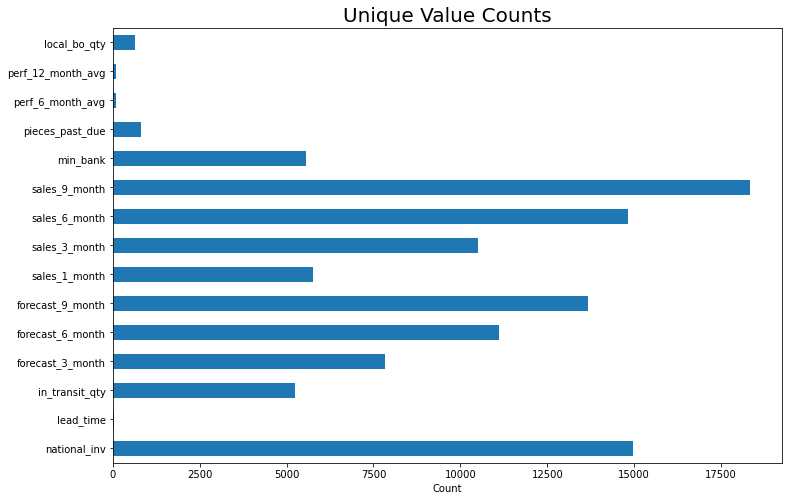

In [26]:
plt.figure(figsize=(12,8))
data.select_dtypes(include=np.number).nunique().plot(kind="barh")
plt.title("Unique Value Counts",size=20)
plt.xlabel("Count")
plt.show()

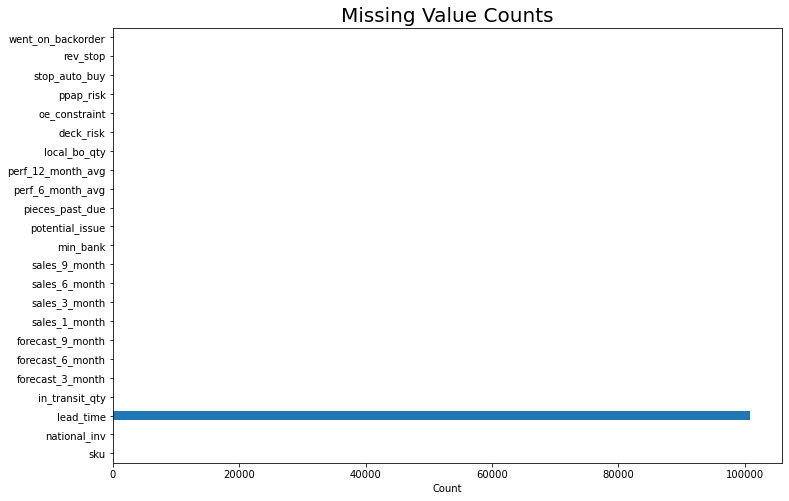

In [27]:
plt.figure(figsize=(12,8))
data.isnull().sum().plot(kind="barh")
plt.title("Missing Value Counts",size=20)
plt.xlabel("Count")
plt.show()

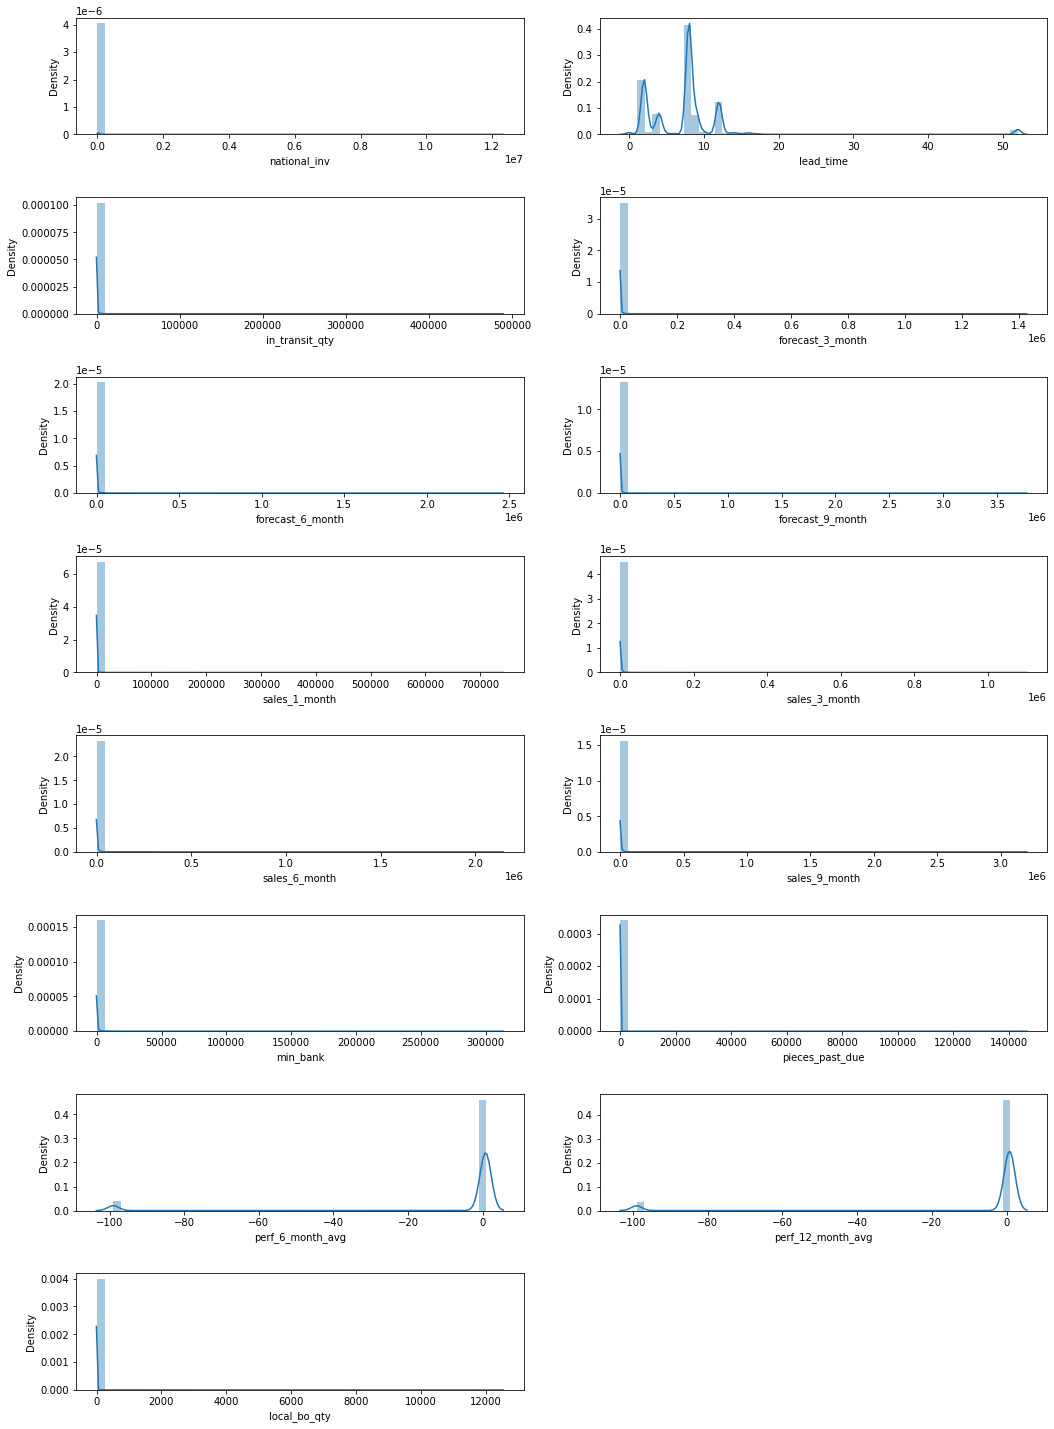

In [28]:
plt.figure(figsize=(15,20))
for index,col in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(8,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    sns.distplot(data[col])

In [29]:
data.skew()

sku                    0.401787
national_inv         340.285800
lead_time              4.556295
in_transit_qty       166.183404
forecast_3_month     138.968325
forecast_6_month     138.961427
forecast_9_month     143.298875
sales_1_month        196.119990
sales_3_month        141.286380
sales_6_month        139.176712
sales_9_month        135.054191
min_bank             131.212649
pieces_past_due      412.391900
perf_6_month_avg      -3.180622
perf_12_month_avg     -3.302181
local_bo_qty         165.190548
dtype: float64

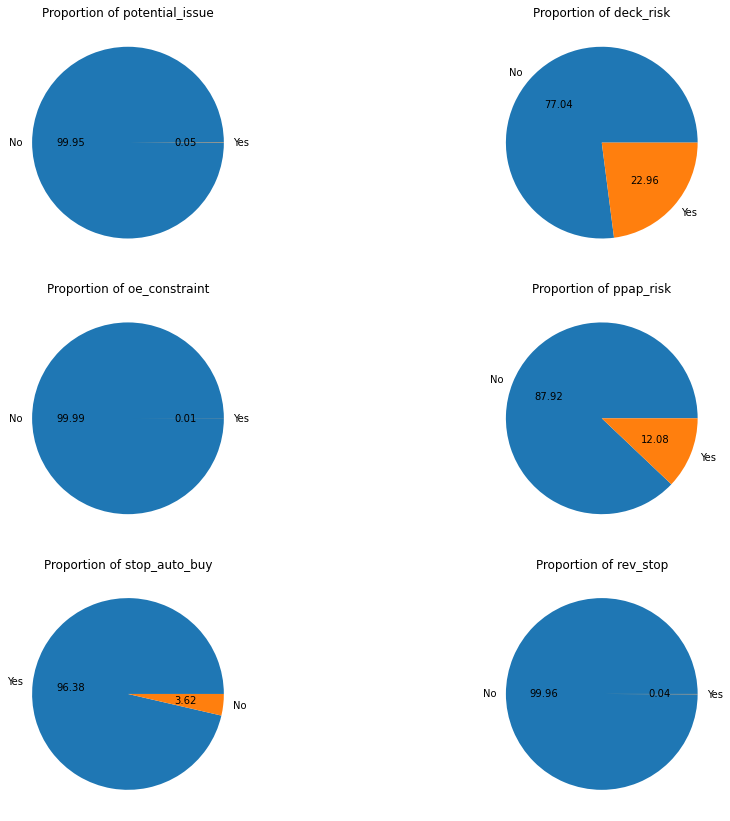

In [30]:
plt.figure(figsize=(15,12))
for index,col in enumerate(data.select_dtypes(exclude=np.number).columns[1:-1]):
    plt.subplot(3,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    proportions = data[col].value_counts(1)*100
    labels = data[col].value_counts(1).index
    plt.pie(x=proportions,labels=labels,autopct="%.2f")
    plt.title(f"Proportion of {col}")

#### Observations - 

- Within numerical features, majority of columns are have large no. of unique values, indicating large amount of variance, which will be good for analysis and models.
- In terms of missing values, only lead time has missing values, which total upto around 100K.
- In terms of distributions of the numerical features, all the features have huge amount of positive skewness, indicated by long extended tails to right of distribution plots and also by 3 digit skewness values.
- We observe that out of 6 categorical features, 4 features i.e potential risk, oe constraint, rev stop and stop auto buy have distribution of categories which is very skewed i.e % of "No" is more than 95%. 
- This distribution in cateogories is due to the imbalance in the dataset.

### Bi-Variate Analysis

In [31]:
logger.info("Part 2: Bi-variate Analysis")

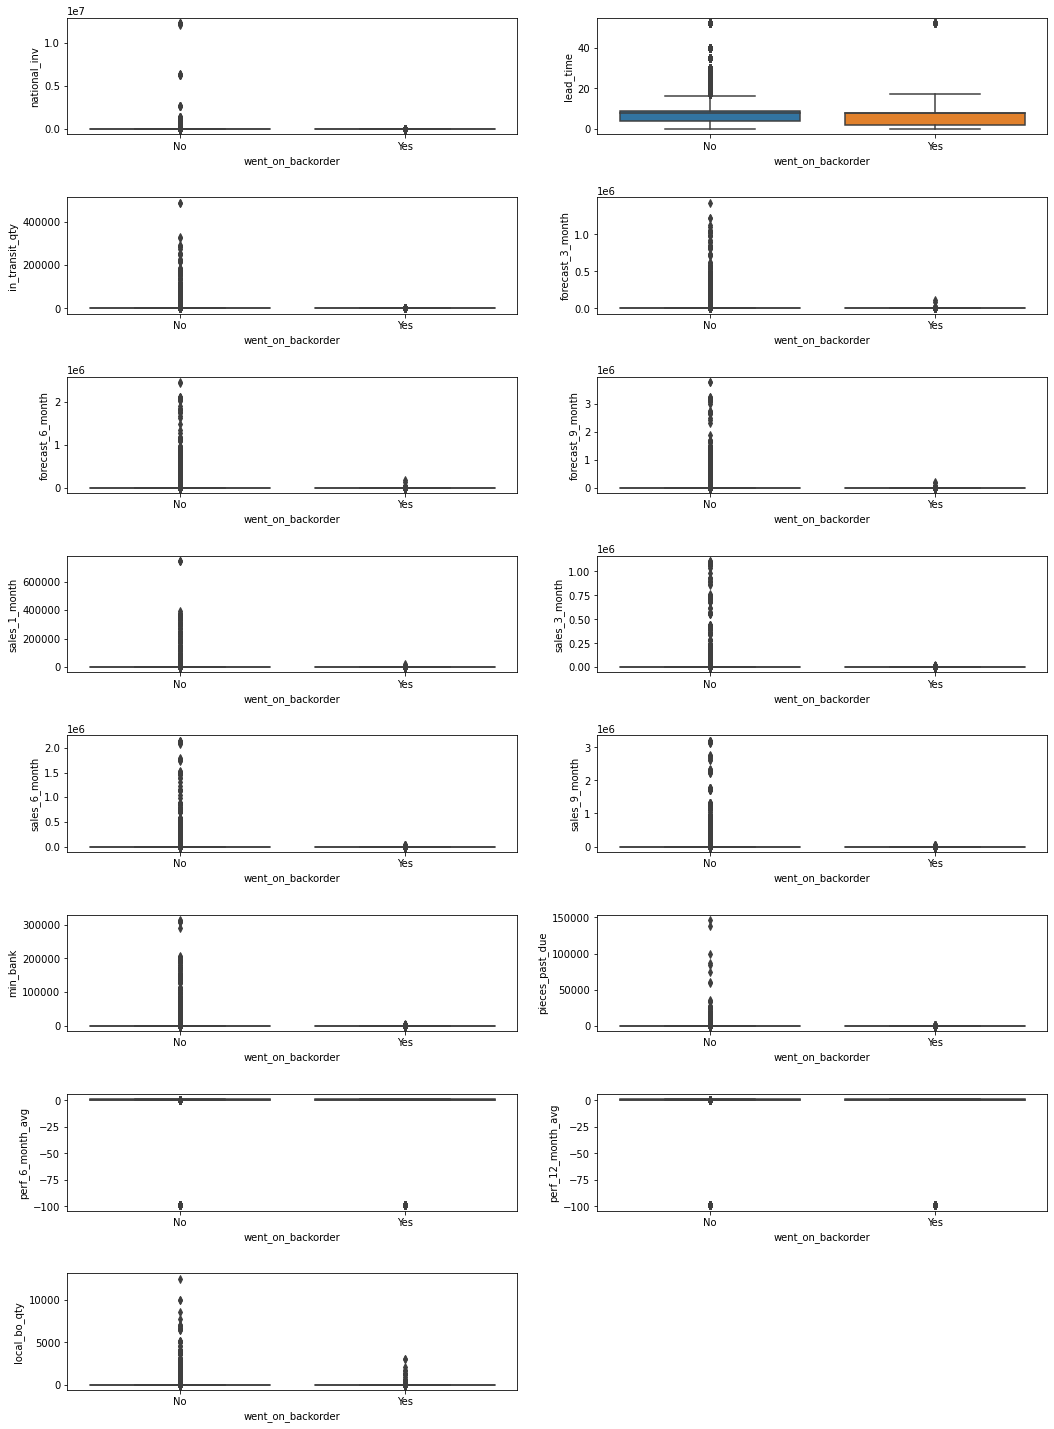

In [32]:
plt.figure(figsize=(15,20))
for index,col in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(8,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    sns.boxplot(y=data[col],x=data.went_on_backorder)

In [33]:
for col in data.select_dtypes(include=np.number).columns:
    print(col)
    print(data.groupby("went_on_backorder")[col].median())
    print()
   

national_inv
went_on_backorder
No     15.0
Yes     1.0
Name: national_inv, dtype: float64

lead_time
went_on_backorder
No     8.0
Yes    8.0
Name: lead_time, dtype: float64

in_transit_qty
went_on_backorder
No     0.0
Yes    0.0
Name: in_transit_qty, dtype: float64

forecast_3_month
went_on_backorder
No      0.0
Yes    12.0
Name: forecast_3_month, dtype: float64

forecast_6_month
went_on_backorder
No      0.0
Yes    19.0
Name: forecast_6_month, dtype: float64

forecast_9_month
went_on_backorder
No      0.0
Yes    24.0
Name: forecast_9_month, dtype: float64

sales_1_month
went_on_backorder
No     0.0
Yes    3.0
Name: sales_1_month, dtype: float64

sales_3_month
went_on_backorder
No     1.0
Yes    8.0
Name: sales_3_month, dtype: float64

sales_6_month
went_on_backorder
No      2.0
Yes    14.0
Name: sales_6_month, dtype: float64

sales_9_month
went_on_backorder
No      4.0
Yes    19.0
Name: sales_9_month, dtype: float64

min_bank
went_on_backorder
No     0.0
Yes    0.0
Name: min_bank, dty

In [34]:
import scipy.stats as stats

In [35]:
for col in data.select_dtypes(include=np.number).columns:
    print(col)
    print(stats.mannwhitneyu(data[data.went_on_backorder=="Yes"][col],data[data.went_on_backorder=="No"][col])[1])
    print()
   

national_inv
0.0

lead_time
2.1123370536440789e-215

in_transit_qty
2.7893561764443105e-111

forecast_3_month
0.0

forecast_6_month
0.0

forecast_9_month
0.0

sales_1_month
0.0

sales_3_month
0.0

sales_6_month
0.0

sales_9_month
0.0

min_bank
0.02455040869873347

pieces_past_due
0.0

perf_6_month_avg
6.552852288212608e-66

perf_12_month_avg
4.192338623136861e-75

local_bo_qty
0.0



In [36]:
for col in data.select_dtypes(include=np.number).columns:
    print(col)
    print(stats.ttest_ind(data[data.went_on_backorder=="Yes"][col],data[data.went_on_backorder=="No"][col])[1])
    print()
   

national_inv
0.08744713324701338

lead_time
nan

in_transit_qty
0.0016126635962829929

forecast_3_month
0.6589779635127829

forecast_6_month
0.2748740297076927

forecast_9_month
0.18092018870352136

sales_1_month
0.14188456746073766

sales_3_month
0.049449359643634304

sales_6_month
0.024730382181077277

sales_9_month
0.021936631424358873

min_bank
0.015271347350611569

pieces_past_due
0.5025473532890707

perf_6_month_avg
5.6365183895106e-52

perf_12_month_avg
2.863087863078559e-51

local_bo_qty
5.040913896288599e-35



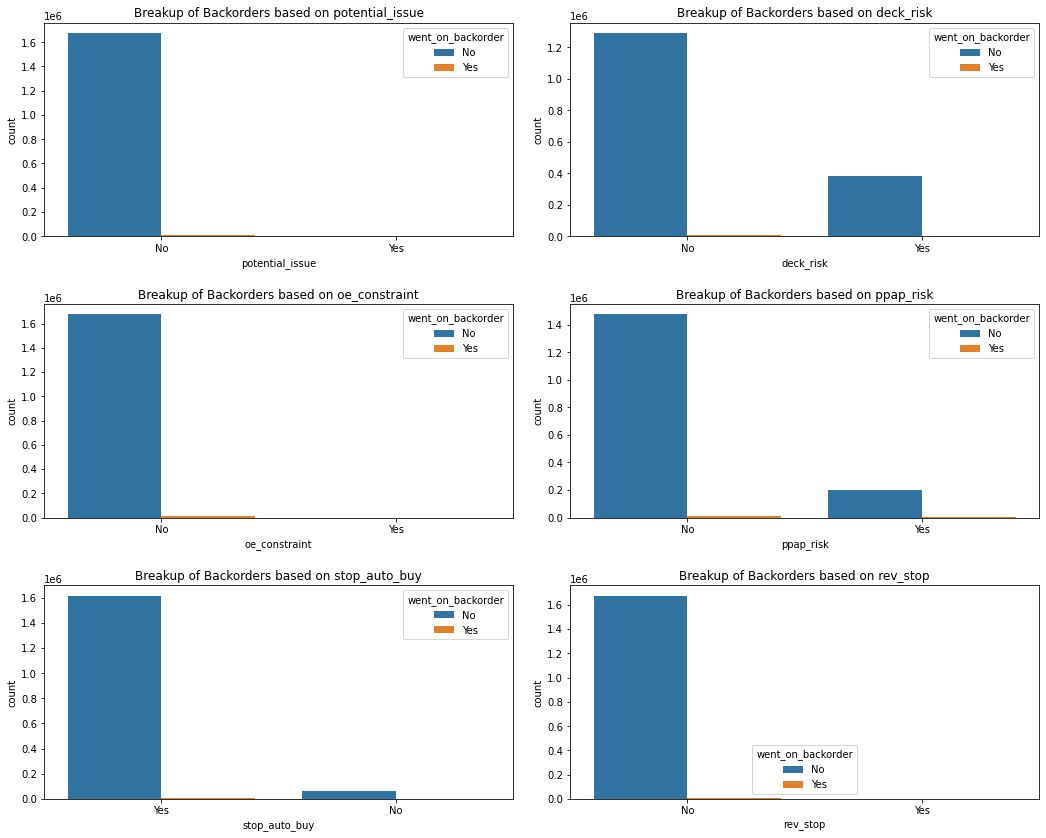

In [37]:
plt.figure(figsize=(15,12))
for index,col in enumerate(data.select_dtypes(exclude=np.number).columns[1:-1]):
    plt.subplot(3,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    sns.countplot(x=data[col],hue=data.went_on_backorder)
    plt.title(f"Breakup of Backorders based on {col}",size=12)

In [38]:
pd.crosstab(index=data.went_on_backorder,columns=data.potential_issue,normalize=True,margins=True) * 100

potential_issue,No,Yes,All
went_on_backorder,,,
No,99.280213,0.050715,99.330928
Yes,0.666051,0.003022,0.669072
All,99.946263,0.053737,100.000000


In [39]:
pd.crosstab(index=data.went_on_backorder,columns=data.deck_risk,normalize=True,margins=True) * 100

deck_risk,No,Yes,All
went_on_backorder,,,
No,76.487386,22.843542,99.330928
Yes,0.555556,0.113517,0.669072
All,77.042942,22.957058,100.000000


In [40]:
pd.crosstab(index=data.went_on_backorder,columns=data.oe_constraint,normalize=True,margins=True) * 100

oe_constraint,No,Yes,All
went_on_backorder,,,
No,99.316886,0.014041,99.330928
Yes,0.668598,0.000474,0.669072
All,99.985485,0.014515,100.000000


In [41]:
pd.crosstab(index=data.went_on_backorder,columns=data.ppap_risk,normalize=True,margins=True) * 100

ppap_risk,No,Yes,All
went_on_backorder,,,
No,87.358667,11.972261,99.330928
Yes,0.564857,0.104215,0.669072
All,87.923524,12.076476,100.000000


In [42]:
pd.crosstab(index=data.went_on_backorder,columns=data.stop_auto_buy,normalize=True,margins=True) * 100

stop_auto_buy,No,Yes,All
went_on_backorder,,,
No,3.591234,95.739694,99.330928
Yes,0.027905,0.641167,0.669072
All,3.619139,96.380861,100.000000


In [43]:
pd.crosstab(index=data.went_on_backorder,columns=data.rev_stop,normalize=True,margins=True) * 100

rev_stop,No,Yes,All
went_on_backorder,,,
No,99.287619,0.043309,99.330928
Yes,0.669072,0.000000,0.669072
All,99.956691,0.043309,100.000000


In [44]:
stats.chi2_contingency(pd.crosstab(data.went_on_backorder,data["deck_risk"]))[1]

4.981380770364453e-52

In [45]:
for col in data.select_dtypes(exclude=np.number).columns[1:-1]:
    print(col)
    print("p value of chi square:",stats.chi2_contingency(pd.crosstab(data.went_on_backorder,data[col]))[1])
    print()
   

potential_issue
p value of chi square: 3.0754846573427014e-73

deck_risk
p value of chi square: 4.981380770364453e-52

oe_constraint
p value of chi square: 4.362933706176436e-06

ppap_risk
p value of chi square: 2.7404638447902615e-30

stop_auto_buy
p value of chi square: 0.0017855596321260765

rev_stop
p value of chi square: 0.04630940389527151



Text(0.5, 1.0, 'Lead Time for backorders')

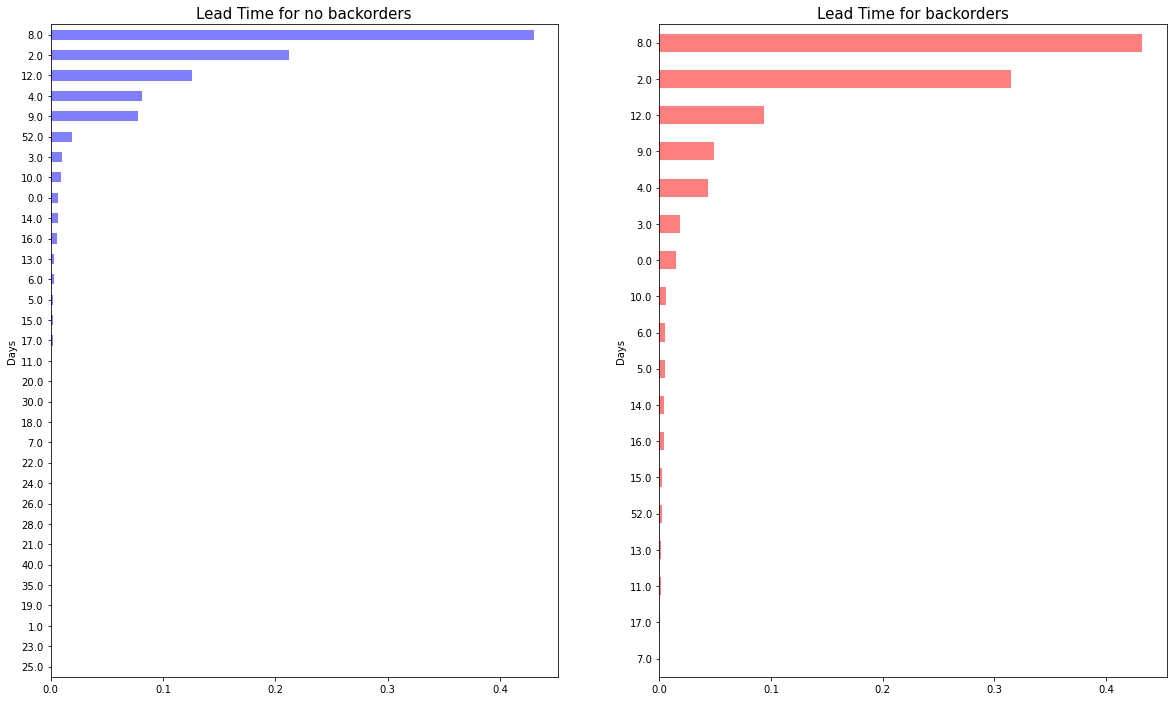

In [46]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
(data[data.went_on_backorder=="No"].lead_time.value_counts(1).sort_values(ascending=True)).plot(kind="barh",color="blue",alpha=0.5)
plt.ylabel("Days")
plt.title("Lead Time for no backorders",size=15)

plt.subplot(1,2,2)
(data[data.went_on_backorder=="Yes"].lead_time.value_counts(1).sort_values(ascending=True)).plot(kind="barh",color="red",alpha=0.5)
plt.ylabel("Days")
plt.title("Lead Time for backorders",size=15)

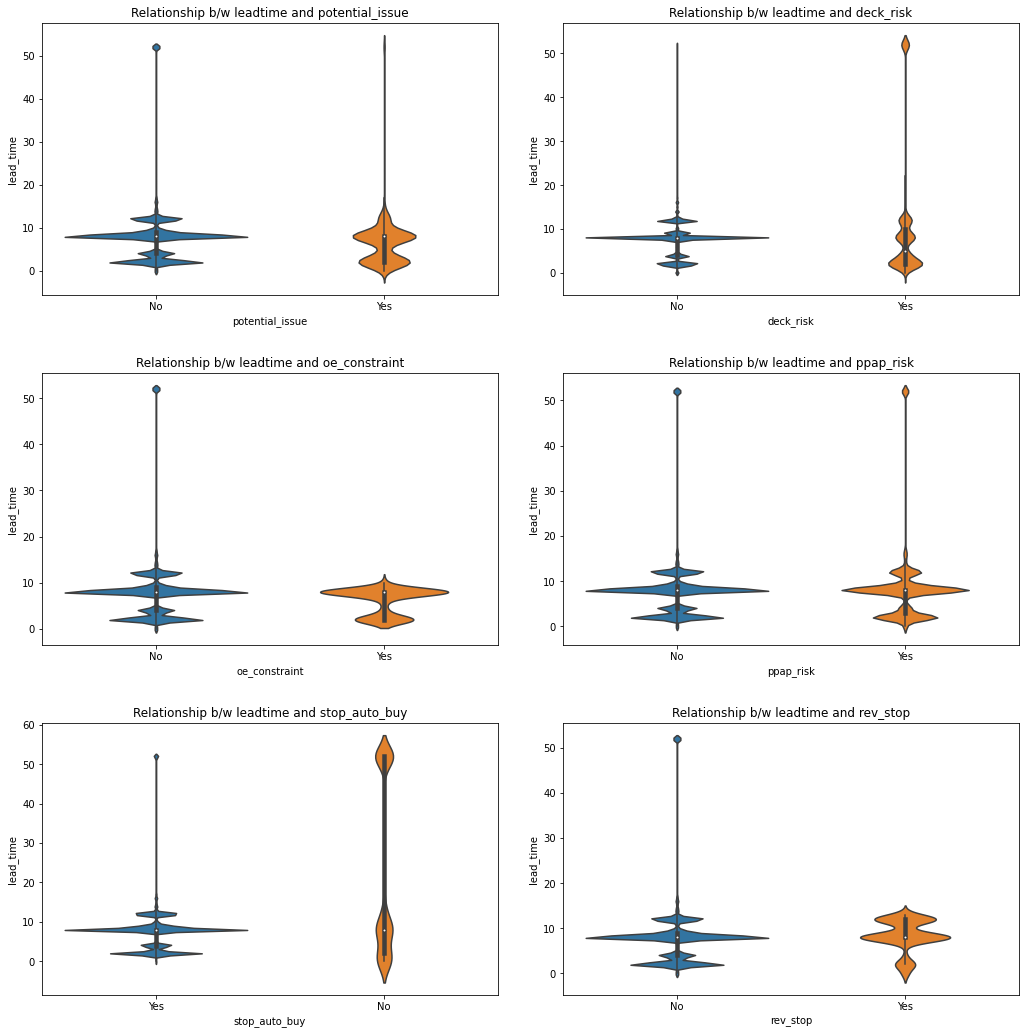

In [47]:

plt.figure(figsize=(15,15))
for index,i in enumerate(data.select_dtypes(include=np.object).columns[1:-1]):
    plt.subplot(3,2,index+1)
    plt.tight_layout(pad=3,h_pad=3)
    sns.violinplot(x=data[i],y=data.lead_time)
    plt.title(f"Relationship b/w leadtime and {i}")

In [48]:
for index,i in enumerate(data.select_dtypes(include=np.object).columns[1:-1]):
    print(data.groupby(i)["lead_time"].median())
    print()

potential_issue
No     8.0
Yes    8.0
Name: lead_time, dtype: float64

deck_risk
No     8.0
Yes    5.0
Name: lead_time, dtype: float64

oe_constraint
No     8.0
Yes    8.0
Name: lead_time, dtype: float64

ppap_risk
No     8.0
Yes    8.0
Name: lead_time, dtype: float64

stop_auto_buy
No     8.0
Yes    8.0
Name: lead_time, dtype: float64

rev_stop
No     8.0
Yes    8.0
Name: lead_time, dtype: float64



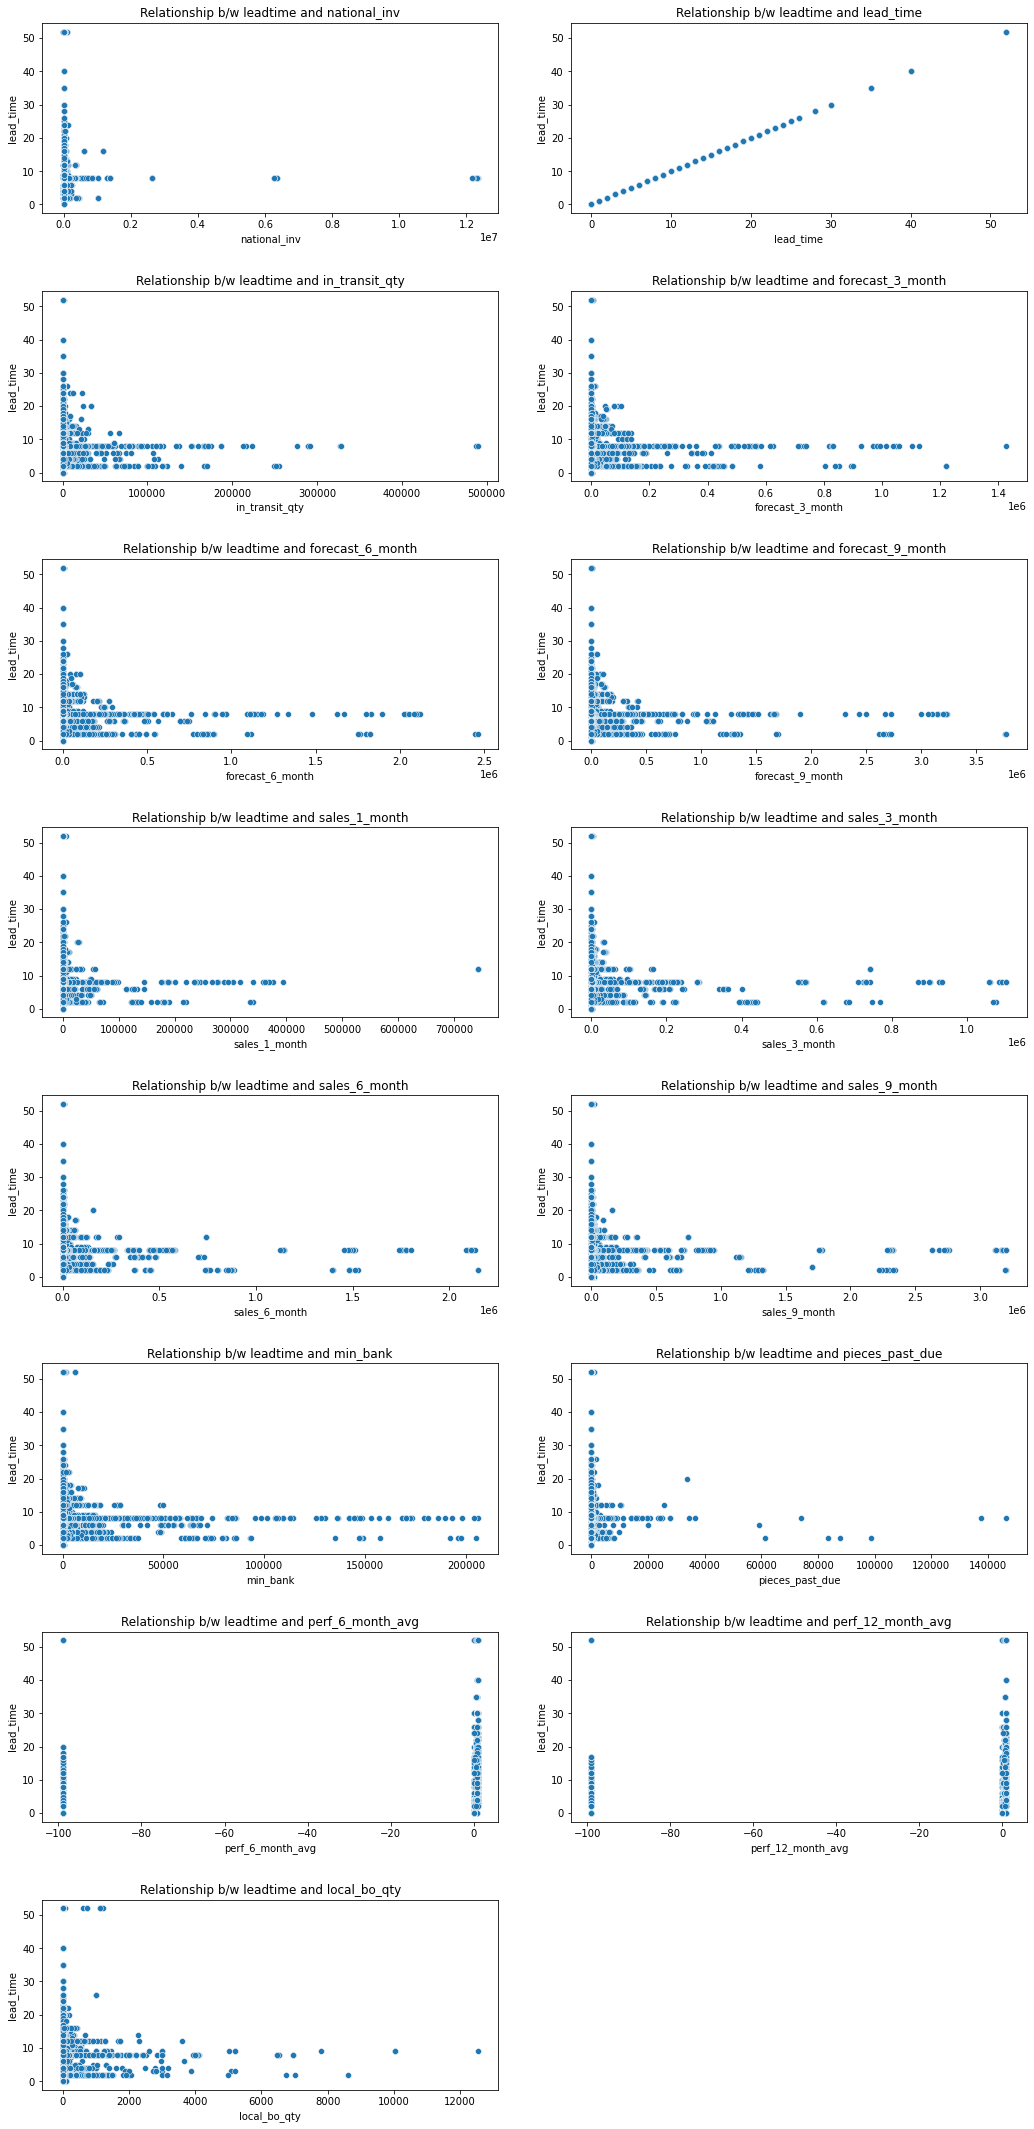

In [49]:
plt.figure(figsize=(15,30))
for index,i in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(8,2,index+1)
    plt.tight_layout(pad=3,h_pad=3)
    sns.scatterplot(x=data[i],y=data.lead_time)
    plt.title(f"Relationship b/w leadtime and {i}")

#### Observations - 

- In terms of the numerical features, based on analyzing relationship between independent features and predicted feature i.e went on backorder, we observed that majority of features show a very significant pattern and help in seperating back orders from none backorders.
- Since the numerical features are heavily skewed, we use medians for comparisons.
- Using boxplots, except min_bank, pieces_past_due, perf_6_month_avg, perf_12_month_avg and local_bo_qty, all other numerical features show clear relations with backorders/none backorders in terms of difference in distributions.
- except min_bank, pieces_past_due, perf_6_month_avg, perf_12_month_avg and local_bo_qty don't appearently have any significant difference in medians based on boxplots.
- However, on conducting a mann whitney u test to confirm significant difference in backorders and not backorders based on numerical features, we observed all there are significant difference between medians of the 2 target classes using any or all numerical features.


- In terms of categorical features,it is very difficult to visually observe any pattern due to heavy imbalance in target classes.
- However, using the chi square test of independence, we can conclude that there is a dependence/ relationship between the categorical features and the target classes of the predicted feature i.e went on backorders.


- On trying to check which feature is significantly related to lead time in order to fill missing values in lead time, we couldnt find any such feature across categorical or numerical features as majority of the features don't have any significant relation with lead time.


### Multivariate Analysis

In [50]:
logger.info("Multivariate Analysis Started")

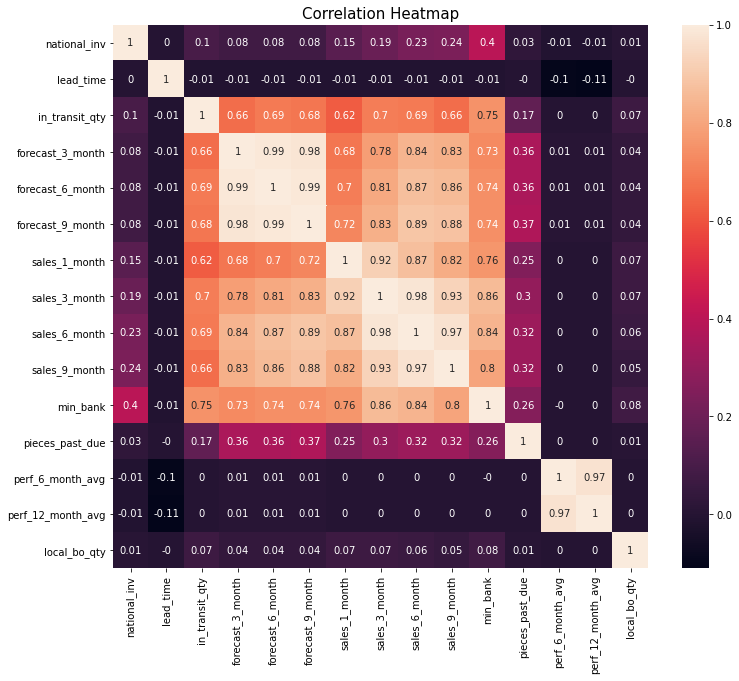

In [51]:
plt.figure(figsize=(12,10))
sns.heatmap(round(data.corr(),2),annot=True)
plt.title("Correlation Heatmap",size=15)
plt.show()

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
num_cols = data.select_dtypes(include=np.number).drop("lead_time",axis=1)
vif = [variance_inflation_factor(num_cols.values,i) for i in range(len(num_cols.columns))]
VIF = pd.DataFrame({"Feature":num_cols.columns,"vif":vif})
VIF.sort_values("vif",ascending=False,inplace=True)
VIF

,Feature,vif
3,forecast_6_month,473.799337
4,forecast_9_month,267.345009
7,sales_6_month,98.112543
2,forecast_3_month,91.728933
6,sales_3_month,61.792100
8,sales_9_month,20.771026
11,perf_6_month_avg,17.305419
12,perf_12_month_avg,17.302878
5,sales_1_month,7.629196
9,min_bank,7.438261


#### Actual Sales vs Average performance of sales

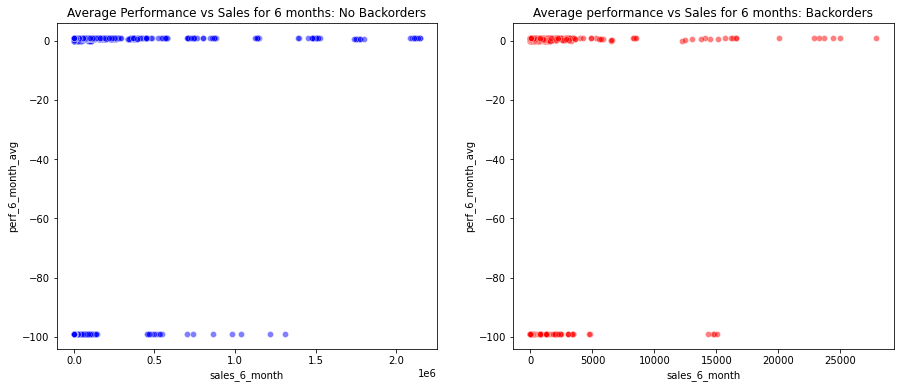

In [54]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(y=data[data.went_on_backorder=="No"].perf_6_month_avg,x=data[data.went_on_backorder=="No"].sales_6_month,alpha=0.5,color="blue")
plt.title("Average Performance vs Sales for 6 months: No Backorders")

plt.subplot(1,2,2)
sns.scatterplot(y=data[data.went_on_backorder=="Yes"].perf_6_month_avg,x=data[data.went_on_backorder=="Yes"].sales_6_month,alpha=0.5,color="red")
plt.title("Average performance vs Sales for 6 months: Backorders")

plt.show()

#### Did Sales for a period of n month overtake forecasted sales for double the period of n months

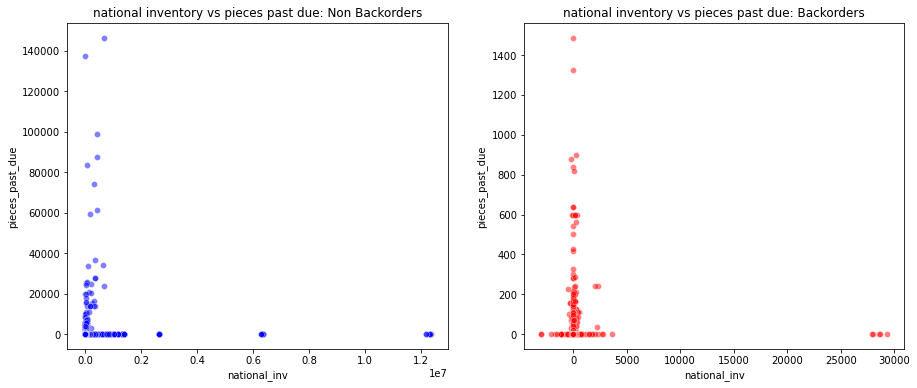

In [55]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(data[data.went_on_backorder=="No"].national_inv,data[data.went_on_backorder=="No"].pieces_past_due,alpha=0.5,color="blue")
plt.title("national inventory vs pieces past due: Non Backorders")

plt.subplot(1,2,2)
sns.scatterplot(data[data.went_on_backorder=="Yes"].national_inv,data[data.went_on_backorder=="Yes"].pieces_past_due,alpha=0.5,color="red")
plt.title("national inventory vs pieces past due: Backorders")
plt.show()

In [56]:
print("% of non backorders where national inventory of product was less than the stock which was past its shelf lifespan:",round(len(data[(data.went_on_backorder=="No")&(data.national_inv < data.pieces_past_due)]) / len(data[data.went_on_backorder=="No"]),4) * 100)
print("% of backorders where national inventory of product was less than the stock which was past its shelf lifespan:",round(len(data[(data.went_on_backorder=="Yes")&(data.national_inv < data.pieces_past_due)]) / len(data[data.went_on_backorder=="Yes"]),4) * 100)

% of non backorders where national inventory of product was less than the stock which was past its shelf lifespan: 0.67
% of backorders where national inventory of product was less than the stock which was past its shelf lifespan: 12.94


#### Analysis of Inventory and Quantity

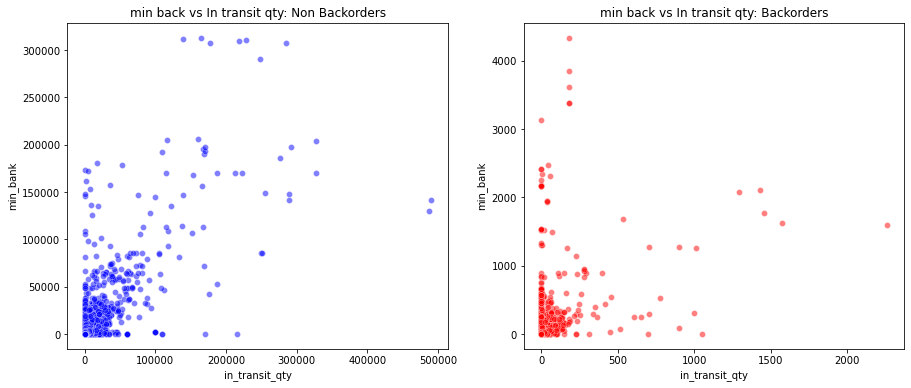

In [57]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(data[data.went_on_backorder=="No"].in_transit_qty,data[data.went_on_backorder=="No"].min_bank,alpha=0.5,color="blue")
plt.title("min back vs In transit qty: Non Backorders")

plt.subplot(1,2,2)
sns.scatterplot(data[data.went_on_backorder=="Yes"].in_transit_qty,data[data.went_on_backorder=="Yes"].min_bank,alpha=0.5,color="red")
plt.title("min back vs In transit qty: Backorders")

plt.show()

In [58]:
print("% of non backorders where minimum stock recommended to hold was less than what was in transit:",round(len(data[(data.went_on_backorder=="No")&(data.in_transit_qty < data.min_bank)]) / len(data[data.went_on_backorder=="No"]),4) * 100)
print("% of backorders minimum stock recommended to hold was less than what was in transit:",round(len(data[(data.went_on_backorder=="Yes")&(data.in_transit_qty < data.min_bank)]) / len(data[data.went_on_backorder=="Yes"]),4) * 100)

% of non backorders where minimum stock recommended to hold was less than what was in transit: 42.54
% of backorders minimum stock recommended to hold was less than what was in transit: 46.94


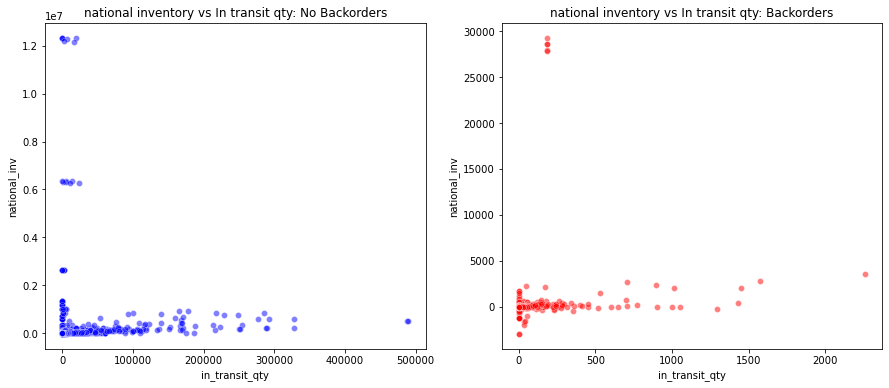

In [59]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(data[data.went_on_backorder=="No"].in_transit_qty,data[data.went_on_backorder=="No"].national_inv,alpha=0.5,color="blue")
plt.title("national inventory vs In transit qty: No Backorders")

plt.subplot(1,2,2)
sns.scatterplot(data[data.went_on_backorder=="Yes"].in_transit_qty,data[data.went_on_backorder=="Yes"].national_inv,alpha=0.5,color="red")
plt.title("national inventory vs In transit qty: Backorders")

plt.show()

In [60]:
print("% of non backorders where national level inventory of product was less than what was in transit:",round(len(data[(data.went_on_backorder=="No")&(data.national_inv < data.in_transit_qty)]) / len(data[data.went_on_backorder=="No"]),4) * 100)
print("% of backorders national level inventory of product was less than what was in transit:",round(len(data[(data.went_on_backorder=="Yes")&(data.national_inv < data.in_transit_qty)]) / len(data[data.went_on_backorder=="Yes"]),4) * 100)

% of non backorders where national level inventory of product was less than what was in transit: 2.98
% of backorders national level inventory of product was less than what was in transit: 11.81


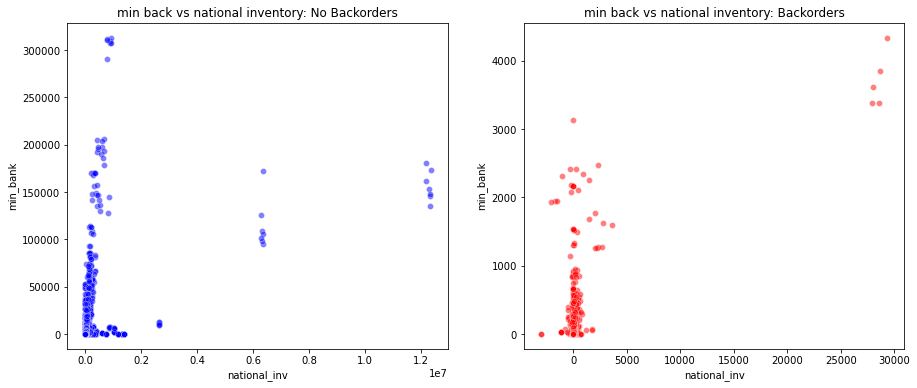

In [61]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(data[data.went_on_backorder=="No"].national_inv,data[data.went_on_backorder=="No"].min_bank,alpha=0.5,color="blue")
plt.title("min back vs national inventory: No Backorders")

plt.subplot(1,2,2)
sns.scatterplot(data[data.went_on_backorder=="Yes"].national_inv,data[data.went_on_backorder=="Yes"].min_bank,alpha=0.5,color="red")
plt.title("min back vs national inventory: Backorders")

plt.show()

In [62]:
print("% of non backorders where national level inventory of product was less than minimum stock that was recommended:",round((len(data[(data.went_on_backorder=="No")&(data.national_inv < data.min_bank)]) / len(data[data.went_on_backorder=="No"])) * 100,2))
print("% of backorders national level inventory of product was less than minimum stock that was recommended:",round((len(data[(data.went_on_backorder=="Yes")&(data.national_inv < data.min_bank)]) / len(data[data.went_on_backorder=="Yes"])) * 100,2))

% of non backorders where national level inventory of product was less than minimum stock that was recommended: 3.86
% of backorders national level inventory of product was less than minimum stock that was recommended: 33.8


Text(0.5, 1.0, 'Relation between ppap risk and potential issues\nFor-Backordered Products')

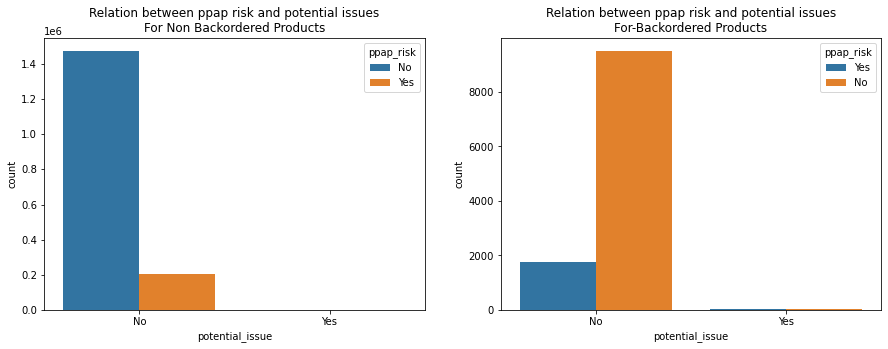

In [63]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x=data[data.went_on_backorder=="No"].potential_issue,hue=data[data.went_on_backorder=="No"].ppap_risk)
plt.title("Relation between ppap risk and potential issues\nFor Non Backordered Products")

plt.subplot(1,2,2)
sns.countplot(x=data[data.went_on_backorder=="Yes"].potential_issue,hue=data[data.went_on_backorder=="Yes"].ppap_risk)
plt.title("Relation between ppap risk and potential issues\nFor-Backordered Products")

In [64]:

print("% of Backorders where there was a potential issue and ppap risk",len(data[(data.went_on_backorder=="Yes")&(data.potential_issue=="Yes")&(data.ppap_risk =="Yes")])/len(data[data.went_on_backorder=="Yes"])*100)
print("% of non Backorders where there was a potential issue and ppap risk",len(data[(data.went_on_backorder=="No")&(data.potential_issue=="Yes")&(data.ppap_risk =="Yes")])/len(data[data.went_on_backorder=="No"])*100)


% of Backorders where there was a potential issue and ppap risk 0.15939077304524926
% of non Backorders where there was a potential issue and ppap risk 0.012227366994578803


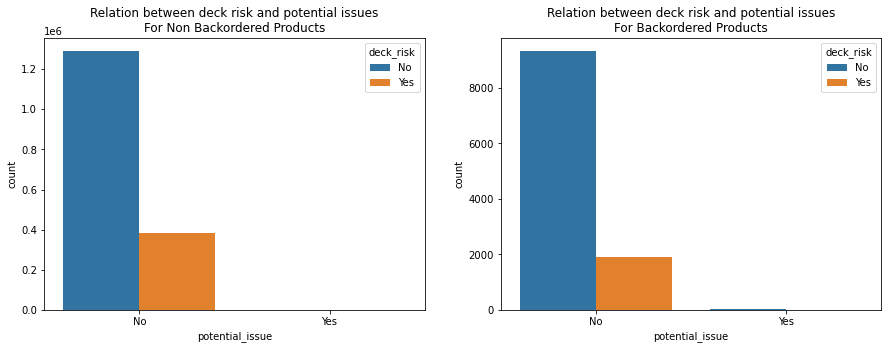

In [65]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x=data[data.went_on_backorder=="No"].potential_issue,hue=data[data.went_on_backorder=="No"].deck_risk)
plt.title("Relation between deck risk and potential issues\nFor Non Backordered Products")

plt.subplot(1,2,2)
sns.countplot(x=data[data.went_on_backorder=="Yes"].potential_issue,hue=data[data.went_on_backorder=="Yes"].deck_risk)
plt.title("Relation between deck risk and potential issues\nFor Backordered Products")

plt.show()

In [66]:

print("% of Backorders where there was a potential issue and deck risk",len(data[(data.went_on_backorder=="Yes")&(data.potential_issue=="Yes")&(data.deck_risk =="Yes")])/len(data[data.went_on_backorder=="Yes"])*100)
print("% of non Backorders where there was a potential issue and deck risk",len(data[(data.went_on_backorder=="No")&(data.potential_issue=="Yes")&(data.deck_risk =="Yes")])/len(data[data.went_on_backorder=="No"])*100)


% of Backorders where there was a potential issue and deck risk 0.07084034357566635
% of non Backorders where there was a potential issue and deck risk 0.01425532054489919


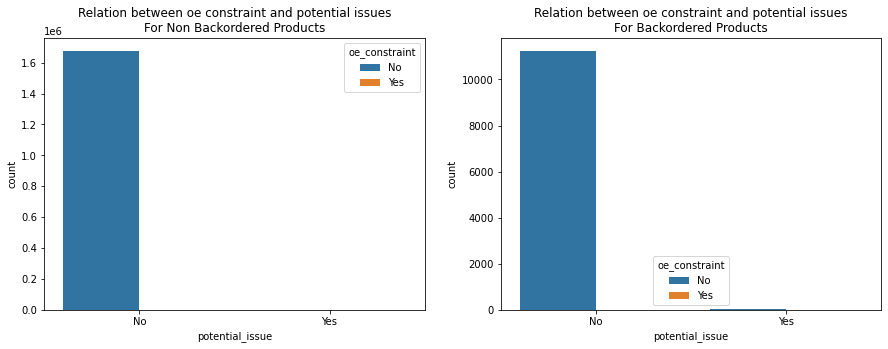

In [67]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x=data[data.went_on_backorder=="No"].potential_issue,hue=data[data.went_on_backorder=="No"].oe_constraint)
plt.title("Relation between oe constraint and potential issues\nFor Non Backordered Products")

plt.subplot(1,2,2)
sns.countplot(x=data[data.went_on_backorder=="Yes"].potential_issue,hue=data[data.went_on_backorder=="Yes"].oe_constraint)
plt.title("Relation between oe constraint and potential issues\nFor Backordered Products")

plt.show()

In [68]:

print("% of Backorders where there was a potential issue and oe constraint",len(data[(data.went_on_backorder=="Yes")&(data.potential_issue=="Yes")&(data.oe_constraint =="Yes")])/len(data[data.went_on_backorder=="Yes"])*100)
print("% of non Backorders where there was a potential issue and oe constraint",len(data[(data.went_on_backorder=="No")&(data.potential_issue=="Yes")&(data.oe_constraint =="Yes")])/len(data[data.went_on_backorder=="No"])*100)


% of Backorders where there was a potential issue and oe constraint 0.0
% of non Backorders where there was a potential issue and oe constraint 0.00041751984859537375


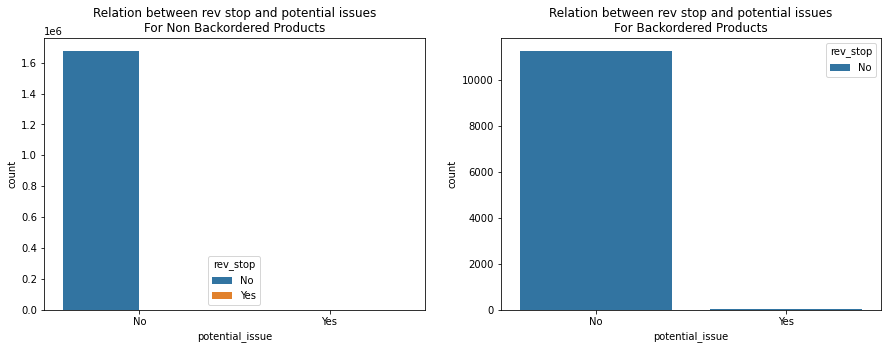

In [69]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x=data[data.went_on_backorder=="No"].potential_issue,hue=data[data.went_on_backorder=="No"].rev_stop)
plt.title("Relation between rev stop and potential issues\nFor Non Backordered Products")

plt.subplot(1,2,2)
sns.countplot(x=data[data.went_on_backorder=="Yes"].potential_issue,hue=data[data.went_on_backorder=="Yes"].rev_stop)
plt.title("Relation between rev stop and potential issues\nFor Backordered Products")

plt.show()

In [70]:

print("% of Backorders where there was a potential issue and rev stop",len(data[(data.went_on_backorder=="Yes")&(data.potential_issue=="Yes")&(data.rev_stop =="Yes")])/len(data[data.went_on_backorder=="Yes"])*100)
print("% of non Backorders where there was a potential issue and rev stop",len(data[(data.went_on_backorder=="No")&(data.potential_issue=="Yes")&(data.rev_stop =="Yes")])/len(data[data.went_on_backorder=="No"])*100)


% of Backorders where there was a potential issue and rev stop 0.0
% of non Backorders where there was a potential issue and rev stop 0.0


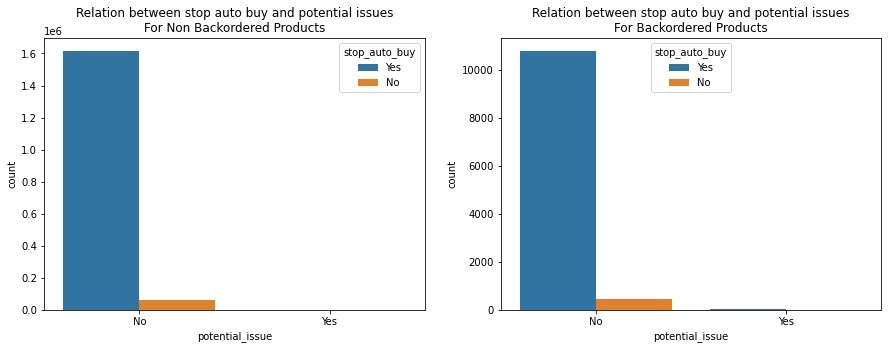

In [71]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x=data[data.went_on_backorder=="No"].potential_issue,hue=data[data.went_on_backorder=="No"].stop_auto_buy)
plt.title("Relation between stop auto buy and potential issues\nFor Non Backordered Products")

plt.subplot(1,2,2)
sns.countplot(x=data[data.went_on_backorder=="Yes"].potential_issue,hue=data[data.went_on_backorder=="Yes"].stop_auto_buy)
plt.title("Relation between stop auto buy and potential issues\nFor Backordered Products")

plt.show()

In [72]:

print("% of Backorders where there was a potential issue and auto buy stop",len(data[(data.went_on_backorder=="Yes")&(data.potential_issue=="Yes")&(data.stop_auto_buy =="Yes")])/len(data[data.went_on_backorder=="Yes"])*100)
print("% of non Backorders where there was a potential issue auto buy stop",len(data[(data.went_on_backorder=="No")&(data.potential_issue=="Yes")&(data.stop_auto_buy =="Yes")])/len(data[data.went_on_backorder=="No"])*100)


% of Backorders where there was a potential issue and auto buy stop 0.45160719029487295
% of non Backorders where there was a potential issue auto buy stop 0.05016202752410133


#### Observations

- Based on the correlation heatmap, we observed that the dataset has a huge amount of multicollinearity with more than 30 pairs of numerical features having a correlation of 0.80 or higher.
- We can see features like sales, forecasts and performance which are given for multiple months i.e 1, 3, 6, 9 or 12 months. However, all of them mainly have they same type and magnitude of correlationship with other features. Also, these features are contributing the most to the multi-collinearity. 
- On analysing the variance inflation factors, we can see that the vif for these features is beyond accepted levels of 10, which is causing high multi-collinearity.
- Hence for sales, forecasts and performance, we will keep 1 features for each and get rid of the other similar features.


- In terms of analysis, when understanding the relation of minimum recommended stock of product to hold with stock in transit with respect to backorders and non-backorders, we observed that in for backorders, there we many cases where the minimum stock recommended to hold was way more than the stock that was in circulation.
- Also, around 12% of backordered products observed more no. of pieces past due than the total national inventory for the product. The figure was less than 1% for non backordered items.
- Also, we noticed that for 12 % of backordered items, the national level of inventory has remained same irrespective of the amount of stock in transition. For non backordered items, the number was only 3%.
- Also, we noticed that for 33% of backordered items, the national level inventory for the product was lower than the minimum stock recommended to hold. The figure was only 3% In case of non backordered items.


- Within categorical features, we can observed that there were a few backordered items which had a potential issue flag and ppap risk, deck risk or risk of stopping auto buy attached with them. For non backordered items, such risks was significantly quite low.


**At the end of the EDA, we can claim that based on %, graphical and statistical analysis, the features we have are useful to clearly distinguish between the two classes. However, the imbalance in the target classes needs to be corrected.**

In [73]:
data.drop(["sales_1_month","sales_3_month","sales_9_month","forecast_3_month","forecast_9_month","perf_12_month_avg"],axis=1,inplace=True)
logger.info("Dropping high correlated independent numerical features causing high multi-collinearity")

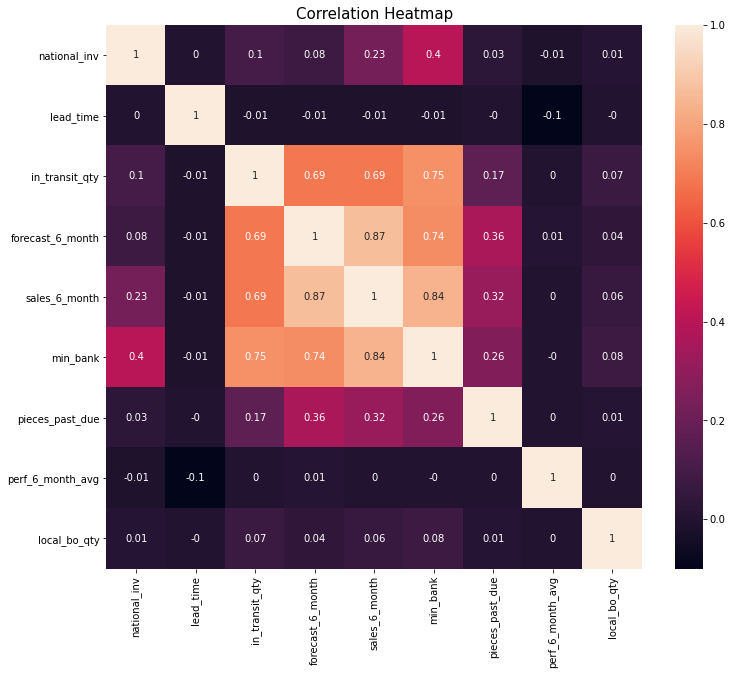

In [74]:
plt.figure(figsize=(12,10))
sns.heatmap(round(data.corr(),2),annot=True)
plt.title("Correlation Heatmap",size=15)
plt.show()

In [75]:
num_cols = data.select_dtypes(include=np.number).drop("lead_time",axis=1)
vif = [variance_inflation_factor(num_cols.values,i) for i in range(len(num_cols.columns))]
VIF = pd.DataFrame({"Feature":num_cols.columns,"vif":vif})
VIF.sort_values("vif",ascending=False,inplace=True)
VIF

,Feature,vif
3,sales_6_month,6.201769
4,min_bank,5.408817
2,forecast_6_month,4.754100
1,in_transit_qty,2.745326
0,national_inv,1.452567
5,pieces_past_due,1.174869
7,local_bo_qty,1.007766
6,perf_6_month_avg,1.000431


In [76]:
logger.info("Exploratory Data Analysis completed")

# Data Preparation

### Seperating Predictors and Predicted variables.

In [77]:
X = data.drop("went_on_backorder",axis=1)
y = data.went_on_backorder

In [78]:
X.to_csv("Xsample.csv")
y.to_csv("Ysample.csv")